In [30]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots

# Review of Tables

## Basics

- what is a CSV?
- read the CSV 'data/skyscrapers.csv' using `read_table()`
- display a table using `show()`
- sort a table using `sort()` ascending/descending
- select column(s) using `select()`
- drop column(s) using `drop()`

In [4]:
skyscrapers = Table.read_table('data/skyscrapers.csv')
skyscrapers

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962


In [9]:
skyscrapers.sort('height', descending=True)

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962


## Subsetting:
- subset rows using `where()`
    - skyscrapers in LA
    - skyscrapers in LA that were completed in 1971
- subset rows using `where()` and [predicates](http://www.data8.org/datascience/reference-nb/datascience-reference.html#Table.where-Predicates)
    - skyscrapers that were completed after 2014
    - skyscrapers that were completed in the 1990s
    
> some predicates: 
> - `are.equal_to()` 
> - `are.above()`,`are.below()`
> - `are.above_or_equal_to()`, `are.below_or_equal_to()`, 
> - `are.between()`, `are.between_or_equal_to()`, 

- skyscrapers that are a 'Tower' (using `are.containing()`) 
- skyscrapers that are in Chicago or Houston  (using `are.contained_in()`)

In [14]:
skyscrapers.where('city', 'Los Angeles').where('completed', 1971)

name,material,city,height,completed
City National Tower,steel,Los Angeles,213.06,1971
Paul Hastings Tower,steel,Los Angeles,213.06,1971


In [17]:
skyscrapers.where('completed', are.equal_to(1971))

name,material,city,height,completed
City National Tower,steel,Los Angeles,213.06,1971
Paul Hastings Tower,steel,Los Angeles,213.06,1971


In [15]:
skyscrapers.where('completed', are.above(2014))

name,material,city,height,completed
432 Park Avenue,concrete,New York City,425.5,2015
Sky,concrete,New York City,206,2015
Mansions at Acqualina,concrete,Sunny Isles Beach,196,2015


In [20]:
skyscrapers.where('completed', 2000)

name,material,city,height,completed
Park Tower,concrete,Chicago,257.35,2000


In [19]:
skyscrapers.where('completed', are.between(1990, 2000)).show()

name,material,city,height,completed
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Bank of America Plaza,composite,Atlanta,311.8,1992
U.S. Bank Tower,steel,Los Angeles,310.29,1990
Two Prudential Plaza,concrete,Chicago,303.28,1990
311 South Wacker Drive,concrete,Chicago,292.92,1990
Key Tower,composite,Cleveland,288.65,1991
Bank of America Corporate Center,concrete,Charlotte,265.48,1992
SunTrust Plaza,concrete,Atlanta,264.25,1992
Two Liberty Place,steel,Philadelphia,258.47,1990
4 Times Square,steel,New York City,246.54,1999


In [21]:
skyscrapers.where('name', are.containing('Tower'))

name,material,city,height,completed
Willis Tower,steel,Chicago,442.14,1974
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
WITI TV Tower,steel,Shorewood,329,1962
New York Times Tower,steel,New York City,318.77,2007
U.S. Bank Tower,steel,Los Angeles,310.29,1990
The Franklin - North Tower,composite,Chicago,306.94,1989
JPMorgan Chase Tower,composite,Houston,305.41,1982
Key Tower,composite,Cleveland,288.65,1991


In [25]:
skyscrapers.where('city', are.contained_in(('Chicago', 'Houston')))

name,material,city,height,completed
Willis Tower,steel,Chicago,442.14,1974
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
The Franklin - North Tower,composite,Chicago,306.94,1989
JPMorgan Chase Tower,composite,Houston,305.41,1982
Two Prudential Plaza,concrete,Chicago,303.28,1990
Wells Fargo Plaza,steel,Houston,302.37,1983
311 South Wacker Drive,concrete,Chicago,292.92,1990
Williams Tower,steel,Houston,274.63,1982


## Visualizations
1. read the csv `data/movies_by_year.csv`
1. Plot the number of movies vs the total gross using `scatter()`
    - add a trendline
1. Plot the number of movies over time using `plot()`

In [28]:
movie_years = Table.read_table('data/movies_by_year.csv')
movie_years

Year,Total Gross,Number of Movies,#1 Movie
2022,7373451042,449,Top Gun: Maverick
2021,4861041470,406,Spider-Man: No Way Home
2020,1426005959,334,Bad Boys for Life
2019,11443939610,792,Avengers: Endgame
2018,11610362001,872,Black Panther
2017,11127252460,742,Star Wars: Episode VIII - The Last Jedi
2016,11373700570,737,Rogue One: A Star Wars Story
2015,11098999414,707,Star Wars: Episode VII - The Force Awakens
2014,10436810102,708,American Sniper
2013,10955270663,686,The Hunger Games: Catching Fire


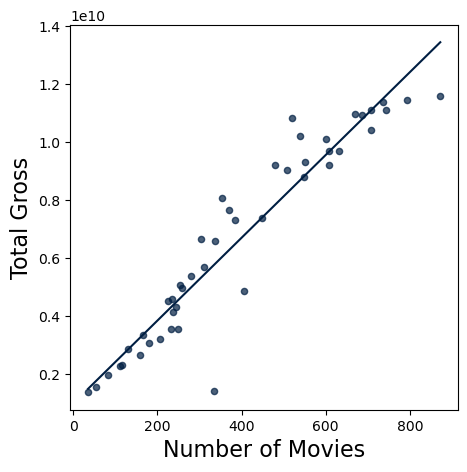

In [34]:
movie_years.scatter('Number of Movies', 'Total Gross', fit_line=True)
movie_years.scatter?

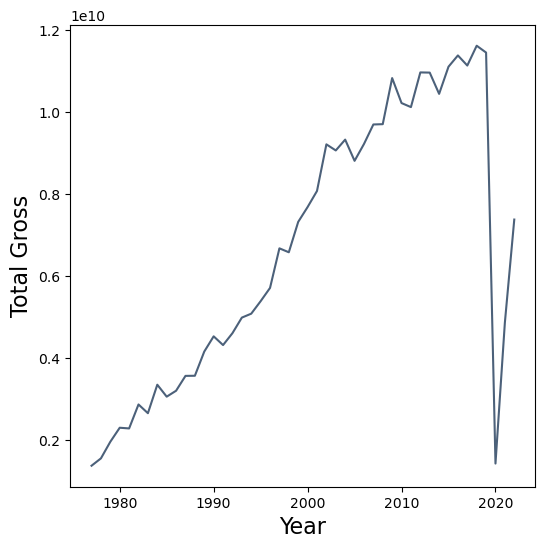

In [35]:
movie_years.plot('Year', 'Total Gross')

# Numbers 
Python has two real number types 
- int: an integer of any size
- float: a number with an optional fractional part

An **int** never has a decimal point; a **float** always does. A float might be printed using scientific notation
Three limitations of float values:
- They have limited size (but the limit is huge)
- They have limited precision of 15-16 decimal places
- After arithmetic, the final few decimal places can be wrong

## Basics
- ints vs floats
- multiplication of two ints -> int
- division of two ints -> float
- raise integer by integer -> int
- raise by float -> float
- inspect data type using `type()` function

In [40]:
1 / 1

1.0

In [41]:
5.0 / 4.0

1.25

In [43]:
2 ** 3

8

In [44]:
10 ** 0.5

3.1622776601683795

In [45]:
2 + 5

7

In [49]:
type(5 + 2)

int

## why integers and float
- (accurately) representing very large numbers
- floats have a limit in precision
    - `10/3 != 3 1/3`
    - difference between two precise numbers
    - $(\sqrt 13)^2 \neq 13$
    
## Converting ("Casting") between int and float
- careful with decimals/rounding

## Scientific notation
- divide by large number
- write scientific notation
- underscores for thousand separators

In [53]:
123456789 ** 122

1461595558633254552853745387570377195124082787643883855073704696001259988587768705927419375769080965658823094666867582105107971269503134255273735348237087023637442207989518894414960784501265504508281806783906910353980623797303494088043484596718339062157033267538579470370975798410363810038250377421413341373803939068462442778732396197253105841222342690739677855321341350075707476514205557985307494843404644983880578735170546396475175937008129456007951788385074797698118676904333589347700899243516583719523812555780761158812306510129115400733463464487853982873489221315492911186569617991094086415359291571244062090607885375504141019412963817692965462591481316124298958898517294574539119798108635602899566193175893278855261710912506014070519241137175171989542666560522499509854874943299977388050916378278774029471718805354054513226519458567261645224778783014471933533720576219940324609759225850740401914811427724940373156038784728625437241957609143605869039203874588759203659823621621573721

In [55]:
12214365.12345968356890467576467578 - 12214365.123459683568

0.0

In [57]:
(10 ** 0.5) **2

10.000000000000002

In [59]:
float(10)

10.0

In [60]:
int(10.0)

10

In [62]:
int(10.7)

10

In [63]:
4/10

0.4

In [64]:
4/10000000000

4e-10

In [65]:
2e5

200000.0

In [66]:
200_000

200000

# Text / Strings
A string value is a snippet of text of any length
- `'a'`
- `'word'`
- `"there can be 2 sentences. Here's the second!"`

Strings consisting of numbers can be converted to numbers
- `int('12')`
- `float('1.2')`

Any value can be converted to a string
- `str(5)`


## Basics
- single quotes vs double quotes 
    - escaping
    - apostrophe
- add/concatenate strings
- multiply by int/float
- add string and number
    - convert
- convert from string to number
- string formatting

In [67]:
1

1

In [68]:
'a'

'a'

In [71]:
int('1') + int('2')

3

In [72]:
str(54)

'54'

In [75]:
n_classes = 4
'I am taking ' + str(n_classes) + ' classes' 

'I am taking 4 classes'

In [76]:
"this is a string"

'this is a string'

In [77]:
'this is a string'

'this is a string'

In [78]:
"Tom's place"

"Tom's place"

In [79]:
"Tom said \"yey\""

'Tom said "yey"'

In [80]:
'a' + 'b'

'ab'

In [83]:
'a' + str(1.0)

'a1.0'

In [85]:
'ha' * 5.1

TypeError: can't multiply sequence by non-int of type 'float'

## Discussion question:
Assume you have run the following statements:
```python
x = 3
y = '4'
z = '5.6'
```

What's the source of the error in each example?
1. `x + y`
1. `x + int(y + z)`
1. `str(x) + int(y)`
1. `y + float(z)`


In [86]:
x = 3
y = '4'
z = '5.6'

In [87]:
x + y

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [93]:
x + float(y+z)

48.6

In [97]:
x + int(y + z)

ValueError: invalid literal for int() with base 10: '45.6'

In [96]:
str(x) + int(y)

TypeError: can only concatenate str (not "int") to str

# Boolean
- inequalities
- logic (and / or)

In [99]:
1 < 0

False

In [103]:
n_tas = 7
n_ulas = 6

In [104]:
n_tas > n_ulas

True

In [105]:
True and True

True

In [106]:
True and False

False

In [107]:
True or True

True

In [108]:
True or False

True

In [110]:
int(False)

0

# Types
We’ve seen 6 types so far:
- `int: 2`
- `float: 2.2`
- `str: 'Red fish, blue fish'`
- `builtin_function_or_method: abs`
- `Table`
- `boolean`


The `type` function can tell you the type of a value
- `type(2)`
- `type(2 + 2)`

An expression’s “type” is based on its value, not how it looks

- `x = 2`
- `type(x)`

In [111]:
type(abs)

builtin_function_or_method

## Arrays 
An array contains a sequence of values
- All elements of an array should have the same type
- Arithmetic is applied to each element individually
- Adding arrays adds elements (**if same length!**)
- A column of a table is an array

## Let's:
- Create an array using `make_array()`
- multiply/raise/add/divide array with/by constant
- sum up all elements in array using `sum()`
- calculate the average value
- create a new array 
- add two arrays
    - check the size of array using `len()`
- make an array of strings
- use numpy functions on arrays
    - `np.average()`
    - `np.median()`

In [117]:
a1 = make_array(1, 2, 3, 4)

In [120]:
a1 / 2

array([ 0.5,  1. ,  1.5,  2. ])

In [124]:
sum(a1)/len(a1)

2.5

In [125]:
sum(make_array(True, True, False))

2

In [126]:
a2 = make_array(4, 6, 2, 9)

In [127]:
a1 + a2

array([ 5,  8,  5, 13])

In [128]:
a3 = make_array(1, 2)

In [129]:
a1 + a3

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [130]:
np.average(a1)

2.5

In [132]:
a4 = make_array(1,2,3,4,5)

In [133]:
np.median(a4)

3.0

## Columns of Tables are Arrays 
- select the height coumn of the skyscrapers using
    - `select`
    - `column`
- calculate the average height of the skyscrapers in SF vs LA

In [136]:
skyscrapers.select('height')

height
541.3
442.14
425.5
423.22
381
365.8
350.22
346.26
343.69
329


In [138]:
np.median(skyscrapers.column('height'))

222.19499969482001

In [141]:
skyscrapers.show()

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962


In [147]:
np.mean(skyscrapers.where('city', 'San Francisco').select('height'))

height
226.47


In [146]:
np.mean(skyscrapers.where('city', 'Los Angeles').select('height'))

/home/jovyan/.local/lib/python3.10/site-packages/datascience/tables.py:305: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


height
231.095
